In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/BigMart Sales Data.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


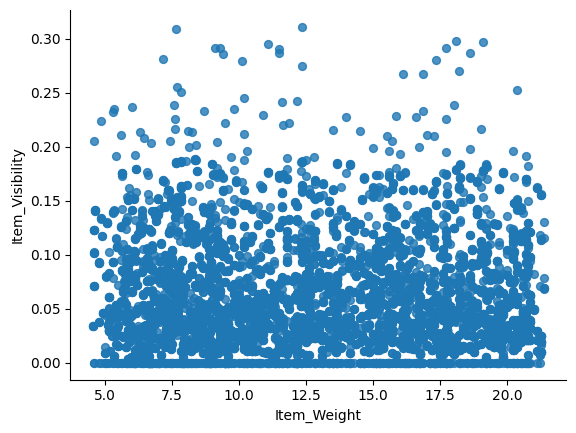

In [11]:
# Item_Weight vs Item_Visibility

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Item_Weight', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

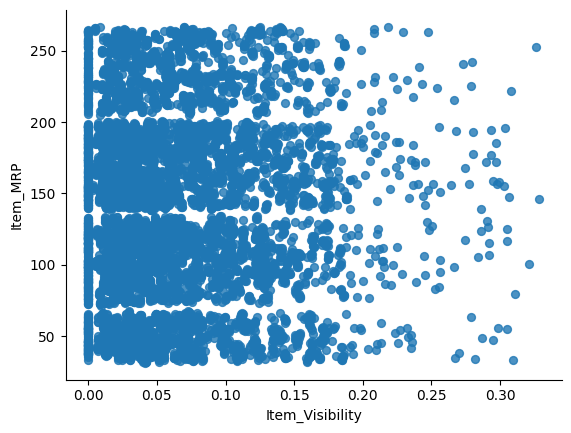

In [9]:
#Item_Visibility vs Item_MRP

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Item_Visibility', y='Item_MRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

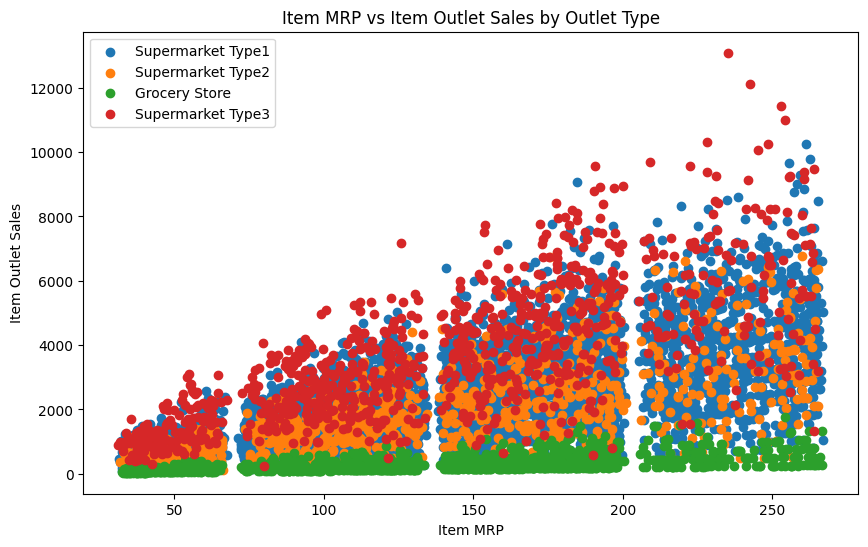

In [7]:
#Item MRP vs Item Outlet Sales by Outlet Type

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
for outlet_type in df['Outlet_Type'].unique():
    subset = df[df['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_MRP'], subset['Item_Outlet_Sales'], label=outlet_type)

# Set labels and title
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Item MRP vs Item Outlet Sales by Outlet Type')

# Add a legend
_ = plt.legend()

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


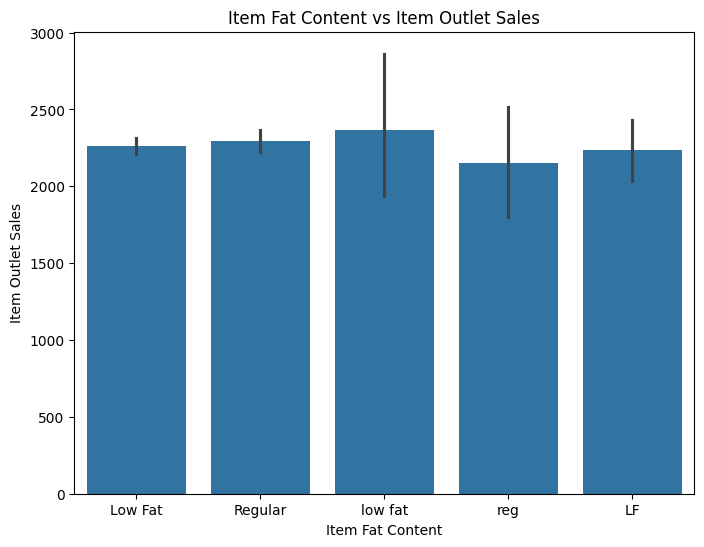

In [ ]:
# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Item Fat Content vs Item Outlet Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

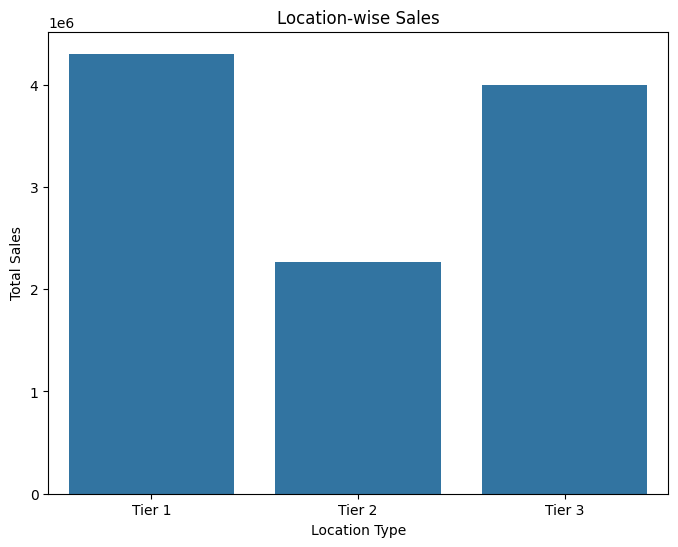

In [ ]:
# Group data by location and calculate total sales
location_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=location_sales)
plt.title('Location-wise Sales')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.show()

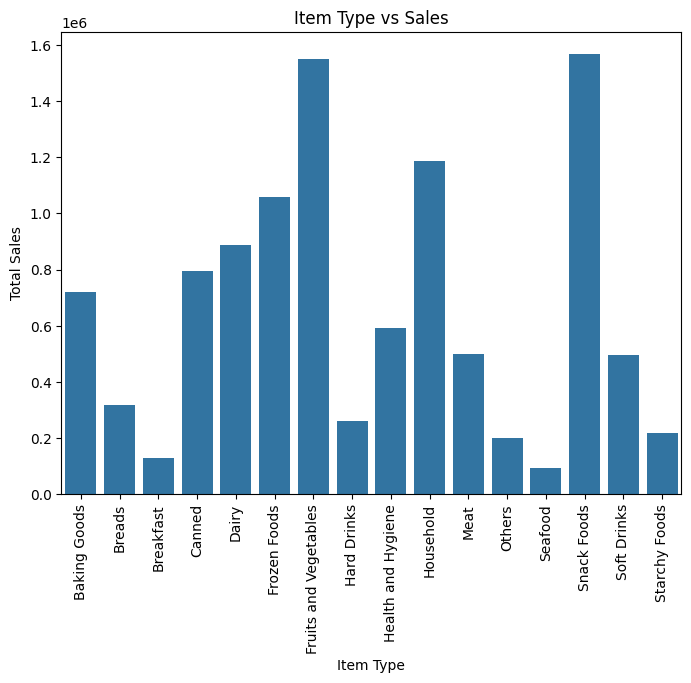

In [ ]:
# Group data by item type and calculate total sales
item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=item_type_sales)
plt.title('Item Type vs Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Group data by location and item type, calculate total sales
location_item_sales = df.groupby(['Outlet_Location_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().reset_index()


In [ ]:
# Find most sold item type for each location
most_sold_item_types = location_item_sales.loc[location_item_sales.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].idxmax()]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


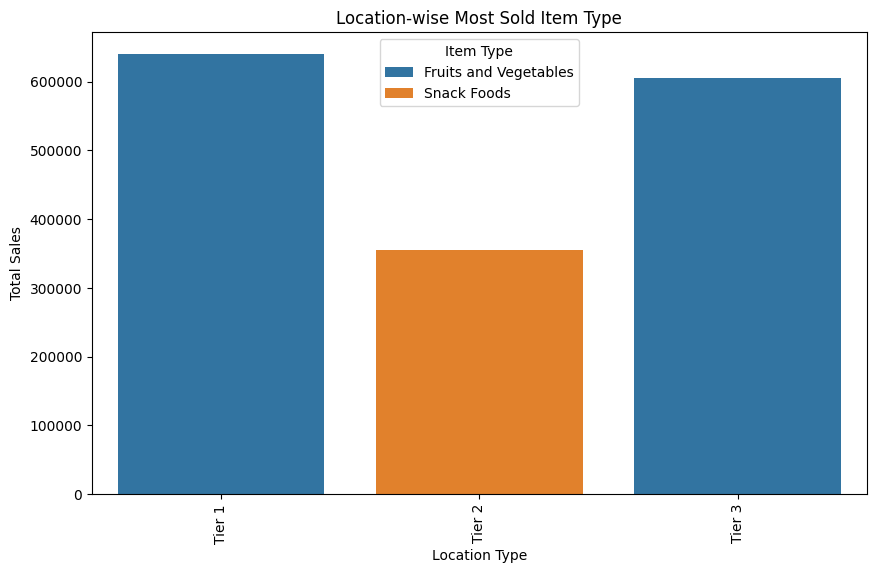

   Outlet_Location_Type              Item_Type  Item_Outlet_Sales
6                Tier 1  Fruits and Vegetables        639865.0926
29               Tier 2            Snack Foods        355573.8190
38               Tier 3  Fruits and Vegetables        604998.4782


In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Item_Type', data=most_sold_item_types)
plt.title('Location-wise Most Sold Item Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Item Type')
plt.show()

# Print most sold item types for each location
print(most_sold_item_types)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Preprocess data
le = LabelEncoder()
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])


In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [ ]:
# Define features (X) and target (y)
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [ ]:
# Define features (X) and target (y)
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.50


In [ ]:
# Predictions on new data
new_data = pd.DataFrame({'Item_Identifier': ['FDA15'],
                         'Item_Weight': [10],
                         'Item_Fat_Content': [1],
                         'Item_Visibility': [0.1],
                         'Item_Type': [1],
                         'Item_MRP': [100],
                         'Outlet_Identifier': ['OUT049'],
                         'Outlet_Establishment_Year': [2010],
                         'Outlet_Size': [2],
                         'Outlet_Location_Type': [1],
                         'Outlet_Type': [1]})
for col in new_data.columns:
  if new_data[col].dtype == 'object':
    new_data[col] = le.fit_transform(new_data[col])


new_prediction = model.predict(new_data)
print(f'Predicted sales: {new_prediction[0]:.2f}')



Predicted sales: 1045.57


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# Feature engineering
poly_features = PolynomialFeatures(degree=2)
df_poly = poly_features.fit_transform(df)


In [ ]:
from sklearn.ensemble import BaggingRegressor, StackingRegressor


In [ ]:
pip install BaggingRegressor

ERROR: Could not find a version that satisfies the requirement BaggingRegressor (from versions: none)
ERROR: No matching distribution found for BaggingRegressor


In [ ]:
# Hyperparameter tuning
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10)
gb_model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=200)
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
en_model = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [ ]:
# Ensemble methods
bagging_model = BaggingRegressor(estimator=GradientBoostingRegressor())
stacking_model = StackingRegressor(estimators=[('rf', RandomForestRegressor()), ('gb', GradientBoostingRegressor())])


In [ ]:
from sklearn.metrics import r2_score as r2_score_metric

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score_metric(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}, R2 Score: {r2:.2f}')

Model: RandomForestRegressor, R2 Score: 0.47
Model: GradientBoostingRegressor, R2 Score: 0.49
Model: SVR, R2 Score: 0.01
Model: ElasticNet, R2 Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+06, tolerance: 8.418e+05
  model = cd_fast.enet_coordinate_descent(


Model: BaggingRegressor, R2 Score: 0.49
Model: StackingRegressor, R2 Score: 0.48
